In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga de dados

In [5]:
df_pontuacao = pd.read_csv('1700665983594-attachment.csv')
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [6]:
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


### Análise EDA

In [7]:
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

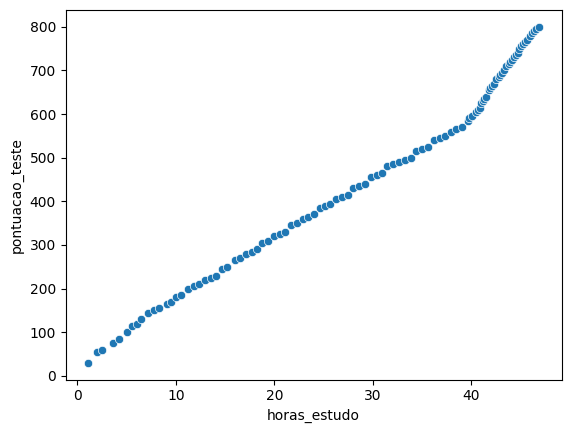

In [8]:
# Plot de disperção
# x = horas_estudo
# y = pontuação_teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

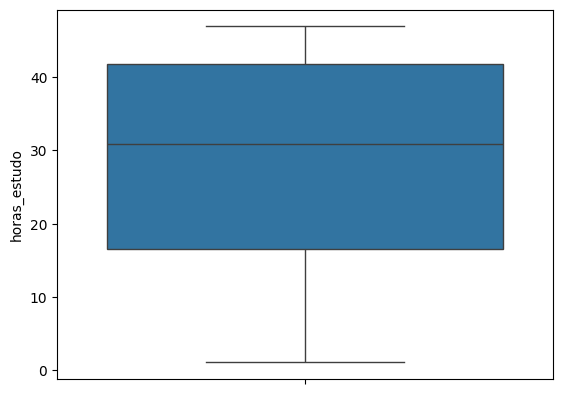

In [9]:
# Verificar outlier com boxplot
sns.boxplot(data=df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

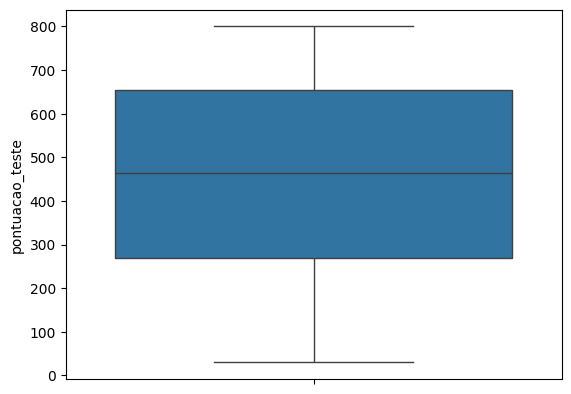

In [10]:
sns.boxplot(data=df_pontuacao, y='pontuacao_teste')

Verificamos que não existe um outilier nos dados

<Axes: >

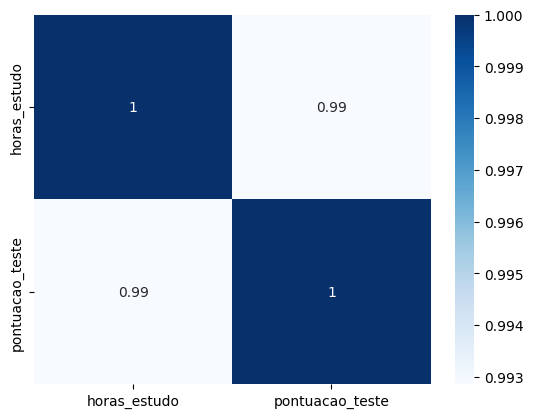

In [11]:
# Verificar a correlação no gráfico - Pearson (correlações lineares)
sns.heatmap(df_pontuacao.corr('pearson'), annot=True, cmap='Blues')

<Axes: >

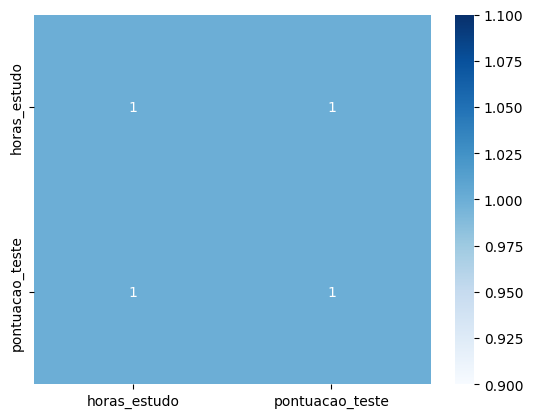

In [12]:
# Verificar a correlação no gráfico - Spearman (correlações não só lineares)
sns.heatmap(df_pontuacao.corr('spearman'), annot=True, cmap='Blues')

array([[<Axes: title={'center': 'horas_estudo'}>,
        <Axes: title={'center': 'pontuacao_teste'}>]], dtype=object)

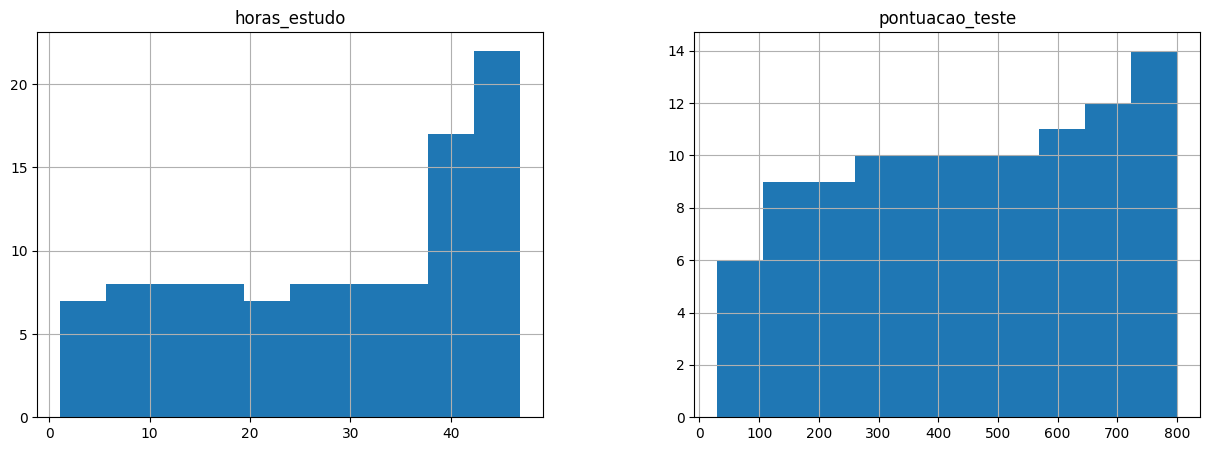

In [13]:
# Histograma das variáveis
df_pontuacao.hist(bins=10, figsize=(15, 5))

In [14]:
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
Y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)


In [15]:
# Instanciar modelo a ser treinado
reg_model = LinearRegression()
reg_model.fit(X_train, Y_train)

LinearRegression()

In [16]:
print("A eq da reta é y={:4f}x+{:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A eq da reta é y=15.642619x+8.476601


### Validar Modelo - Métricas

In [17]:
y_pred = reg_model.predict(X_test)

In [18]:
# Primeira métrica R Squared - Coeficiente de Determinacao
# Representa a proporcao na variacao na variaável dependente que é explicada pela variável independente
# R Squared -> Quanto uma métrica influencia na outra
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
r2_score(Y_test, y_pred)

0.9828400452912442

In [19]:
# Calcular MAE (Mean Absolut Error)
# MAE = Media (y_test - y_pred)
# É uma métreica fácil de interpretar (está na mesma unidade que o dado predito) e menos sensível a outliers
mean_absolute_error(Y_test, y_pred)

22.957470277134615

Para um teste que vai de 0 a 800 o  erro de +/- 23 pontos no teste dado as horas de estudo é um erro baixo  

In [20]:
# Calcular métrica MSE (Mean Squared Error)
# MSE = Média (y_test - y_pred)^2
# Nao é uma métrica fácil de interpretar (nao está na mesma unidade que o dado previsto)
# MSE é mais sensível a outliers e penaliza grandes erros
mean_squared_error(Y_test, y_pred)

766.9972992416427

In [21]:
# MELHOR DOS DOIS MÉTODOS acima
# Calcular métrica RMSE (Square Root Mean Squared Error)
# É uma métrica fácil de interpretar
# RMSE é mais sensível a outliers e penaliza grandes erros
root_mean_squared_error(Y_test, y_pred)

27.69471608884342

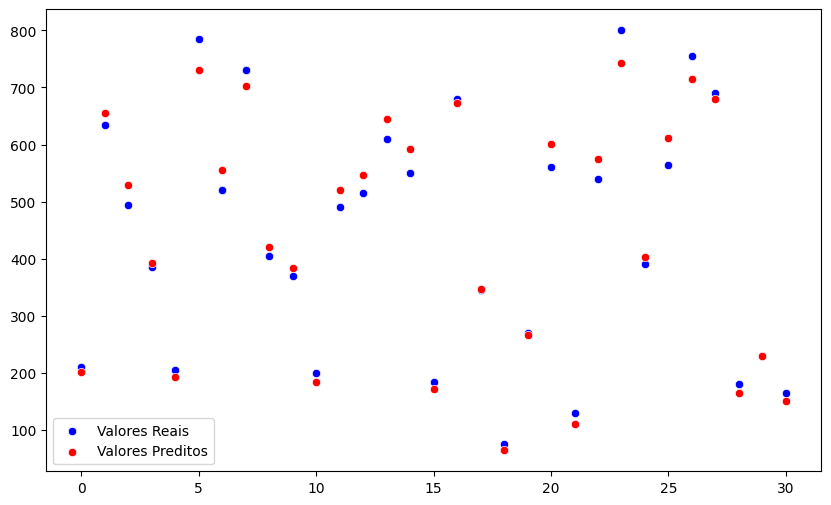

In [22]:
# Análise gráfica
x_axis = range(len(Y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=Y_test.reshape(-1),color="blue", label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1),color="red", label='Valores Preditos')
plt.legend()
plt.show()

### Análise de resíduos

In [25]:
residuos = Y_test - y_pred
residuos

array([[  7.55492934],
       [-19.51674644],
       [-34.37579813],
       [ -8.28501684],
       [ 11.94050046],
       [ 53.83442272],
       [-35.96824964],
       [ 26.99113609],
       [-14.87746835],
       [-13.89944571],
       [ 16.32607158],
       [-29.990227  ],
       [-31.58267852],
       [-35.13117531],
       [-41.94627228],
       [ 12.27590456],
       [  6.71211132],
       [ -2.92142308],
       [ 10.20997248],
       [  3.42019333],
       [-41.3318434 ],
       [ 19.84637871],
       [-34.73939189],
       [ 57.88458975],
       [-12.67058796],
       [-45.71741453],
       [ 41.04130312],
       [ 10.4550639 ],
       [ 15.09721383],
       [  0.96247782],
       [ 14.17557051]])

In [26]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (x-media)/desvio padrao
from scipy.stats import zscore
residuos_padronizados = zscore(residuos)
residuos_padronizados

array([[ 0.38486997],
       [-0.59857428],
       [-1.13836535],
       [-0.19055447],
       [ 0.54418647],
       [ 2.06608474],
       [-1.19621501],
       [ 1.09093729],
       [-0.43004125],
       [-0.39451221],
       [ 0.70350297],
       [-0.97904884],
       [-1.03689851],
       [-1.16580625],
       [-1.41338117],
       [ 0.55637083],
       [ 0.35425256],
       [ 0.00429107],
       [ 0.48132084],
       [ 0.23466566],
       [-1.39106055],
       [ 0.83138666],
       [-1.15157377],
       [ 2.21321687],
       [-0.34987098],
       [-1.55037705],
       [ 1.60134366],
       [ 0.49022438],
       [ 0.65886173],
       [ 0.14538318],
       [ 0.6253808 ]])

### Verificar linearidade do modelo

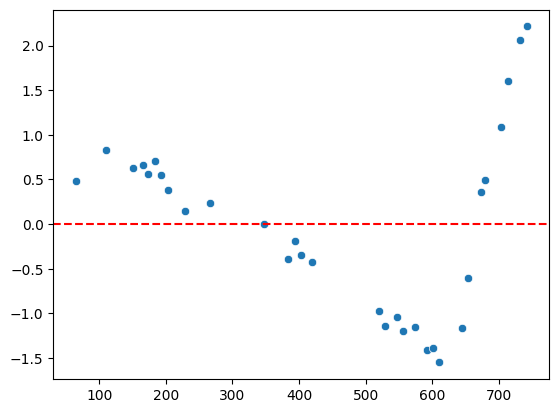

In [27]:
# Verificar a linearidade do modelo
# Se os resíduos estiverem entre -2 e +2 (na escala padrão) - indica linearidade

# Verificar homogeneidade das variâncias (Homocedasticidade)
# Valores estiver em torno da reta, temos homocedasticidade, caso contrário
# Se tivermos alguma tendência ou padrão (formam um cone, funil) há heterocedasticidade
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_padronizados.reshape(-1))
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Existe um padrão no erro, não sendo uma distribuição homogênea em volta da reta, também tendo alguns pontos fora do limite entre -2 e +2, o que indica que no final o modelo não representa nescessariamente uma reta.

### Checar se residuos seguem uma distribuição normal
QQ (Quantile-Quantile) Plot, que avalia de uma amostra segue uma distribuição normal


In [32]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.0 MB/s eta 0:00:00


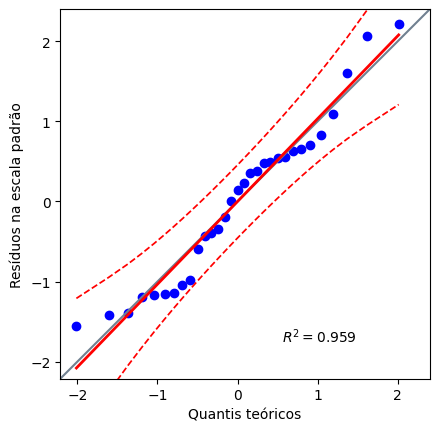

In [34]:
import pingouin as pg
pg.qqplot(residuos, dist='norm', confidence=0.95)
plt.xlabel("Quantis teóricos")
plt.ylabel("Resíduos na escala padrão")
plt.show()

### Teste de normalidade - Shapiro Wilk
H0 - Segue distribuição normal
H1 - Não segue distribuição normal
Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos

In [36]:
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatistica do teste: {} e e P-valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatistica do teste: 0.9500532226161759 e e P-valor: 0.15663817850304967


### Teste de normalidade - Kolmogorov-Smirnov
H0 - Segue distribuição normal
H1 - Não segue distribuição normal
Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos

In [37]:
stat_kolmogorov, p_valor_kolmogorov = kstest(residuos.reshape(-1), "norm")
print("Estatistica do teste: {} e e P-valor: {}".format(stat_kolmogorov, p_valor_kolmogorov))

Estatistica do teste: 0.48355808450512827 e e P-valor: 3.395368995814077e-07


### Aplicndo o modelo

In [40]:
reg_model.predict([[10]])

array([[164.90278617]])

### Salvar/baixar o modelo de predição treinado

In [41]:
import joblib
joblib.dump(reg_model, './reg_model.pkl')

['./reg_model.pkl']